# Predicting success of your app idea

### Based on the data you input, there will be two predictions made: 
1. number of ratings, 
2. average rating

In [1]:
# Setup libraries
import pandas as pd
import numpy as np

In [2]:
# setup datasets to use
app_metrics = pd.read_csv('../data/AppleStore.csv')
app_description_data = pd.read_csv('../data/appleStore_description.csv')

In [3]:
app_metrics.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [4]:
app_description_data.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [5]:
# Combine the two datasets
app_metrics['description'] = app_description_data['app_desc']
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [6]:
app_metrics[app_metrics['currency'] != 'USD'].count()
# All price data is in USD  
# no need to do any currency conversions

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
description         0
dtype: int64

In [7]:
# Convert bytes to mb
app_metrics['size_mb'] = round(app_metrics['size_bytes'] / (1024*1024),1)
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description,size_mb
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.2
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.9
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.6
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.5


## Predicting success based on genre

In [8]:
# One hot encoding for app genres
# Note: should create N -1 columns but not sure best way to do
def create_dummy_variables(dataframe, heading):
    unique_genres = dataframe[heading].unique()
    for x in unique_genres:
        dataframe[x] = np.where(dataframe[heading] == x, 1, 0)
    
create_dummy_variables(app_metrics, 'prime_genre')

In [9]:
# Show all columns
pd.set_option('display.max_columns', None)
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description,size_mb,Games,Productivity,Weather,Shopping,Reference,Finance,Music,Utilities,Travel,Social Networking,Sports,Business,Health & Fitness,Entertainment,Photo & Video,Navigation,Education,Lifestyle,Food & Drink,News,Book,Medical,Catalogs
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


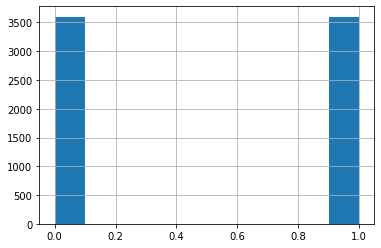

In [10]:
# Create classification of successful. 
# Choose a rating of 300+ so that successful, unsuccessful are roughly 50% each way

app_metrics['successful'] = np.where(app_metrics['rating_count_tot'] > 300, 1, 0)
success_of_categories = app_metrics['successful'].hist()

In [11]:
app_metrics.groupby('prime_genre').successful.mean().sort_values
# Only 15% of books were successful, whereas 65% of business apps were successful
# This shows that this feature should provide us with lot's of explanatory power. 

<bound method Series.sort_values of prime_genre
Book                 0.151786
Business             0.649123
Catalogs             0.400000
Education            0.350993
Entertainment        0.484112
Finance              0.336538
Food & Drink         0.412698
Games                0.512688
Health & Fitness     0.572222
Lifestyle            0.437500
Medical              0.434783
Music                0.637681
Navigation           0.391304
News                 0.440000
Photo & Video        0.610315
Productivity         0.595506
Reference            0.546875
Shopping             0.573770
Social Networking    0.574850
Sports               0.438596
Travel               0.456790
Utilities            0.487903
Weather              0.513889
Name: successful, dtype: float64>

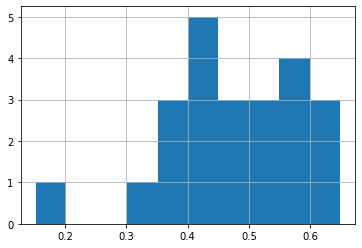

In [12]:
app_metrics.groupby('prime_genre').successful.mean().hist()

In [13]:
# import libraries ready for classification based on category
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

unique_genres = app_metrics['prime_genre'].unique()

X = app_metrics[unique_genres]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression()
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)
# The model achieves a score of 0.55, little better than the toss of a coin.

0.5534511784511784

### Testing app file size

In [14]:
X = app_metrics[['size_mb']]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression()
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)
# The model achieves a score of 0.49, worse than the toss of a coin. So little to add. 

0.4903198653198653

### Length of title and length of description as indicators
Not very helpful when evaluating an idea, but could be helpful in understanding what drives success.

In [15]:
# Create new features: length of title and length of description
app_metrics['length_of_title'] = app_metrics['track_name'].str.len()
app_metrics['length_of_description'] = app_metrics['description'].str.len()
app_metrics.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,description,size_mb,Games,Productivity,Weather,Shopping,Reference,Finance,Music,Utilities,Travel,Social Networking,Sports,Business,Health & Fitness,Entertainment,Photo & Video,Navigation,Education,Lifestyle,Food & Drink,News,Book,Medical,Catalogs,successful,length_of_title,length_of_description
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",96.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,1533
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,151.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,3952
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,95.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,47,2090
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,122.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,50,3997
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,88.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,2998


In [16]:
X = app_metrics[['length_of_title', 'length_of_description']]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression()
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)
# The model achieves a score of 0.63, very helpful in predicting success. 
# Length of description alone was 0.63
# array([[-0.010165  ,  0.00055651]])
# We can see that the length fo the title is really important. 
# Longer titles do worse
# Length of description was not very explanatory
app_success_model.coef_

array([[-0.010165  ,  0.00055651]])

### Test the impact of free vs paid

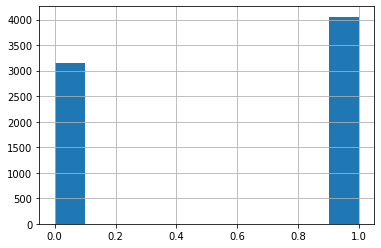

In [17]:
# Create some new features 
app_metrics['app_is_free'] = np.where(app_metrics['price'] == 0,1,0)
app_metrics['app_is_free'].hist()

In [18]:
# Test the explainability of free apps

X = app_metrics[['app_is_free']]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression()
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)
# 54% correct, better than 50%. Could be useful addition to model

0.5484006734006734

### Combining some features

In [19]:
selected_features = ['Games', 'Productivity', 'Weather', 'Shopping', 'Reference', 'Finance', 'Music',
 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business',
 'Health & Fitness', 'Entertainment', 'Photo & Video', 'Navigation',
 'Education', 'Lifestyle', 'Food & Drink', 'News', 'Book', 'Medical','Catalogs','length_of_title', 'length_of_description', 'app_is_free']

X = app_metrics[selected_features]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LogisticRegression(max_iter=4000)
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)

# Successful predictions 66% of the time. 
# app_success_model.predict([])
X_train.head()
example = [[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,50,499,0]]
print(app_success_model.predict(example))
app_success_model.score(X_test,y_test)
app_success_model.coef_

[0]


array([[ 2.63057547e-01,  1.61484557e-01, -1.49629045e-01,
         2.85991698e-01,  9.36188941e-02, -5.23908399e-01,
         9.33499401e-02,  2.56433341e-01, -3.47607188e-01,
         4.73498760e-01, -1.90879637e-01,  1.80275025e-01,
        -4.00962627e-02,  2.84730253e-01,  6.85204666e-01,
        -3.20728641e-01, -8.49983487e-01, -5.38383925e-02,
        -3.34521405e-01,  2.44458428e-02, -1.05540455e+00,
        -1.63746260e-01, -6.09261919e-02, -1.01811849e-02,
         6.96769045e-04,  6.93287229e-01]])

In [20]:
# Next steps:
# Use NLP with the app description to predict success (gensim, word2vec, bag of words)
# Grid search with logistic regression 
# Train/Validation/Test
# Predict rating score with classification
# Predict genre from description

### LinearSVC

In [21]:
from sklearn.svm import LinearSVC

In [22]:
# Same features as before, minus lengh of description
selected_features = ['Games', 'Productivity', 'Weather', 'Shopping', 'Reference', 'Finance', 'Music',
 'Utilities', 'Travel', 'Social Networking', 'Sports', 'Business',
 'Health & Fitness', 'Entertainment', 'Photo & Video', 'Navigation',
 'Education', 'Lifestyle', 'Food & Drink', 'News', 'Book', 'Medical','Catalogs','length_of_title', 'app_is_free']

X = app_metrics[selected_features]
y = app_metrics['successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

app_success_model = LinearSVC(max_iter=10000)
app_success_model.fit(X_train, y_train)
y_predicted = app_success_model.predict(X_test)
app_success_model.score(X_test,y_test)
# app_success_model.coef_

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5631313131313131

### GridSearchCV
* 8 experiments (2 x 4 hyper param options), 5 folds for each. 80% of the data on each fold. 

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_search = GridSearchCV(app_success_model, {'loss':['hinge','squared_hinge'],'C':[0.5,1.0,1.5,2.0] } )

In [25]:
grid_search.fit(X_train, y_train)
y_predicted = grid_search.predict(X_test)
grid_search.score(X_test,y_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.5601851851851852

### Result: 56% 
* This is the best score from LinearSVC from tuning the hyperparameters uding grid search

### Random Forest 
* Forest of multiple decision trees. 
* Each subset of data - overfit specific part of data. 
* In order to predict, use all of the trees and aggregate odds. 
* Removes the overfitting. Cancel each other out
* 150 decision trees, 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
random_forest_model = RandomForestClassifier(random_state=42)
grid_search_random_forest = GridSearchCV(random_forest_model, {'n_estimators':[50, 100, 150], 'max_depth':[None, 5, 10, 20,30,40,50]})
grid_search_random_forest.fit(X_train, y_train)
grid_search_random_forest.predict(X_test)
grid_search_random_forest.score(X_test, y_test)

0.5694444444444444

### Result: 58%

In [28]:
grid_search_random_forest.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [29]:
grid_search_random_forest.score(X_train, y_train)
# 66% - very high overfitting.

0.5984235635760216

In [30]:
grid_search_random_forest.cv_results_

{'mean_fit_time': array([0.1959938 , 0.39412537, 0.63140373, 0.11922369, 0.23456678,
        0.35219135, 0.14222584, 0.28524342, 0.46733975, 0.20517616,
        0.34840212, 0.52071662, 0.18924928, 0.38518939, 0.60454955,
        0.22112432, 0.47534175, 0.62649646, 0.21448989, 0.43825555,
        0.58732877]),
 'std_fit_time': array([0.00645209, 0.01355977, 0.03852075, 0.00618595, 0.01317937,
        0.01928414, 0.00572699, 0.01006214, 0.04288504, 0.01526435,
        0.00764645, 0.0109204 , 0.00182254, 0.00888428, 0.02210556,
        0.02570288, 0.11677248, 0.02974682, 0.00982318, 0.07316576,
        0.01433284]),
 'mean_score_time': array([0.01449594, 0.03211565, 0.04322858, 0.00923357, 0.01891685,
        0.02410803, 0.01064034, 0.0211102 , 0.03956881, 0.01532955,
        0.02607045, 0.03734155, 0.01402116, 0.02704916, 0.04094844,
        0.01550264, 0.03025146, 0.04986858, 0.01616573, 0.03577409,
        0.04061193]),
 'std_score_time': array([0.00049399, 0.00828726, 0.00410967, 0.00